In [ ]:

import tensorflow as tf

print('using tensorflow version',tf.__version__)

using tensorflow version 2.7.0


In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


<function matplotlib.pyplot.show>

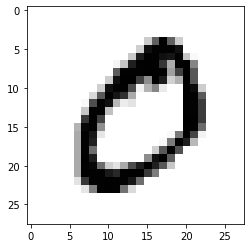

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[1],cmap="binary")
plt.show

In [ ]:
y_train[1]

0

In [ ]:
print((set(y_train)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)
print("y_train_encoded_shape",y_train_encoded.shape)
print("y_test_encoded_shape",y_test_encoded.shape)


y_train_encoded_shape (60000, 10)
y_test_encoded_shape (10000, 10)


In [ ]:
y_train_encoded[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import numpy as np
x_train_reshaped =  np.reshape(x_train,(60000,784))
x_test_reshaped =  np.reshape(x_test,(10000,784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(set(x_train_reshaped[1]))

{0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


In [ ]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon=1e-10
x_train_norm=(x_train_reshaped-x_mean) / (x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean) / (x_std+epsilon)

In [ ]:
print(set(x_train_norm[1]))

{0.2632332858605251, 1.5996639141274305, 2.7960875241949457, 2.6051688630139593, 2.7833596134495466, 2.5924409522685603, 2.465161844814569, 2.6178967737593584, 2.5415293092869637, 2.426978112578372, 1.7142151108360224, 2.668808416740955, 2.057868700961798, 1.421473163691843, 1.1287312165476637, 0.059586713934139515, 2.7451758812133495, 2.1087803439433945, 0.5432473222593053, 0.2250495536243278, -0.18224359022844336, 1.2305545025108566, 2.5033455770507667, 0.3014170180967224, 2.31242691586978, 1.676031378599825, -0.4240738943910262, 0.18686582138813052, -0.05496448277445237, -0.33497851917323257, -0.29679478693703526, 2.070596611707197, 2.706992148977152, 2.4142502018329726, 1.7778546645630178, 1.4342010744372422, 1.2432824132562557, 2.2233315406519862, 1.294194056237852, 0.6577985189678972, 1.9815012364894034, 1.0014521090936728, 1.6378476463636278, -0.27133896544623703, 0.7978055371672873, 0.4796077685323098, 0.5305194115139061, 0.6450706082224981, 2.477889755559968, 2.821543345685743

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
       Dense(128,activation="relu",input_shape=(784,)),
       Dense(128,activation="relu"),
       Dense(10,activation="softmax")
])


In [ ]:
model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3754 - accuracy: 0.8914
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1851 - accuracy: 0.9464
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1409 - accuracy: 0.9595


In [ ]:
loss,  accuracy = model.evaluate(x_test_norm , y_test_encoded)
print("test set accuracy : ", accuracy*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.1303 - accuracy: 0.9614
test set accuracy :  96.13999724388123


In [ ]:
prediction =model.predict(x_test_norm)
print("Shape of pred",prediction.shape)

Shape of pred (10000, 10)


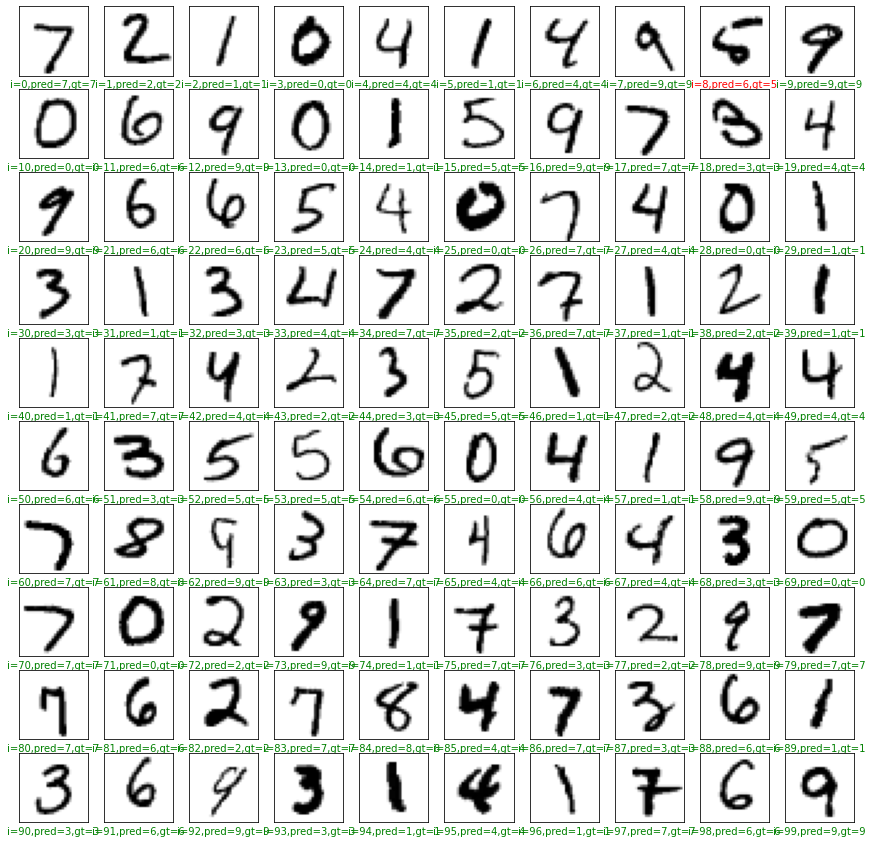

In [ ]:
plt.figure(figsize=(15,15))
start_index=0
for i in range(100):
  
  plt.subplot(10,10,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  pred =  np.argmax(prediction[start_index+i])
  gt=y_test[start_index+i]
  col='g'
  if pred != gt:
    col="r"
  plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt),color=col)
  plt.imshow(x_test[start_index+i],cmap="binary")
plt.show()



